# Matplotlib bar chart storytelling

In [12]:
import pandas as pd 
import duckdb
from constans import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

In [13]:
df.head(12)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [9]:
import os

print(os.path.exists("data/norway_new_car_sales_by_make.csv"))


True


In [20]:
df_quantity_brand = duckdb.query("""
                  SELECT 
                      make AS Brand,
                      quantity
                  FROM df    
                                                                                                                          
""")

df_quantity_brand

# Duckdb

┌───────────────┬──────────┐
│     Brand     │ Quantity │
│    varchar    │  int64   │
├───────────────┼──────────┤
│ Toyota        │     2884 │
│ Volkswagen    │     2521 │
│ Peugeot       │     1029 │
│ Ford          │      870 │
│ Volvo         │      693 │
│ Skoda         │      665 │
│ Opel          │      622 │
│ Audi          │      599 │
│ Honda         │      423 │
│ Mercedes-Benz │      362 │
│     ·         │        · │
│     ·         │        · │
│     ·         │        · │
│ Land Rover    │       18 │
│ Dacia         │        9 │
│ DS            │        9 │
│ Alfa Romeo    │        6 │
│ Fiat          │        3 │
│ Nilsson       │        3 │
│ Maserati      │        2 │
│ Ferrari       │        1 │
│ Smart         │        1 │
│ Ssangyong     │        1 │
├───────────────┴──────────┤
│   4377 rows (20 shown)   │
└──────────────────────────┘

In [19]:
df_quantity_brand = duckdb.query("""
                  SELECT 
                      make AS Brand,
                      quantity
                  FROM df    
                                                                                                                          
""").df()

df_quantity_brand

,Brand,Quantity
0,Toyota,2884
1,Volkswagen,2521
2,Peugeot,1029
3,Ford,870
4,Volvo,693
...,...,...
4372,Nilsson,3
4373,Maserati,2
4374,Ferrari,1
4375,Smart,1


In [23]:
df_quantity_brand = duckdb.query("""
                  SELECT 
                      make AS Brand,
                      SUM(quantity) AS Quantity
                  FROM df 
                  GROUP BY brand
                  ORDER BY quantity DESC   
                                                                                                                          
""").df()

df_quantity_brand

# Dataframe

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0
...,...,...
61,Martin Motors,1.0
62,Westfield,1.0
63,McLaren,1.0
64,Infiniti,1.0


In [22]:
df_quantity_brand = duckdb.query("""
                  SELECT 
                      make AS Brand,
                      SUM(quantity) AS Quantity
                  FROM df 
                  GROUP BY brand
                  ORDER BY quantity DESC   
                                                                                                                          
""")

df_quantity_brand

┌───────────────┬──────────┐
│     Brand     │ Quantity │
│    varchar    │  int128  │
├───────────────┼──────────┤
│ Volkswagen    │   206669 │
│ Toyota        │   168177 │
│ Volvo         │    99937 │
│ Ford          │    99713 │
│ BMW           │    73315 │
│ Audi          │    70475 │
│ Skoda         │    66007 │
│ Nissan        │    64535 │
│ Peugeot       │    61033 │
│ Mercedes-Benz │    57557 │
│    ·          │        · │
│    ·          │        · │
│    ·          │        · │
│ Tazzari       │        3 │
│ Binz          │        2 │
│ Lamborghini   │        2 │
│ Westfield     │        1 │
│ McLaren       │        1 │
│ Martin Motors │        1 │
│ Infiniti      │        1 │
│ Secma         │        1 │
│ Koenigsegg    │        1 │
│ Tata          │        1 │
├───────────────┴──────────┤
│    66 rows (20 shown)    │
└──────────────────────────┘

In [25]:
df_quantity_brand = duckdb.query("""
                  SELECT 
                      make AS Brand,
                      SUM(quantity) AS Quantity
                  FROM df 
                  GROUP BY brand
                  ORDER BY quantity DESC   
                                                                                                                          
""").df().set_index("Brand")

df_quantity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Koenigsegg,1.0
Secma,1.0
Martin Motors,1.0


In [27]:
df_quantity_brand = duckdb.query("""
                  SELECT 
                      make AS Brand,
                      SUM(quantity) AS Quantity
                  FROM df 
                  GROUP BY brand
                  ORDER BY quantity DESC   
                                                                                                                          
""").df().set_index("Quantity")

df_quantity_brand

,Brand
Quantity,
206669.0,Volkswagen
168177.0,Toyota
99937.0,Volvo
99713.0,Ford
73315.0,BMW
...,...
1.0,Martin Motors
1.0,Westfield
1.0,McLaren


## Bar charts

In [31]:
df_quantity_brand.head()


,Brand
Quantity,
206669.0,Volkswagen
168177.0,Toyota
99937.0,Volvo
99713.0,Ford
73315.0,BMW


In [32]:
df_quantity_brand.dtypes


Brand    object
dtype: object

In [36]:
df_quantity_brand = df_quantity_brand.reset_index().set_index("Brand")

In [37]:
df_quantity_brand["Quantity"] = pd.to_numeric(df_quantity_brand["Quantity"], errors="coerce")

<Axes: xlabel='Brand'>

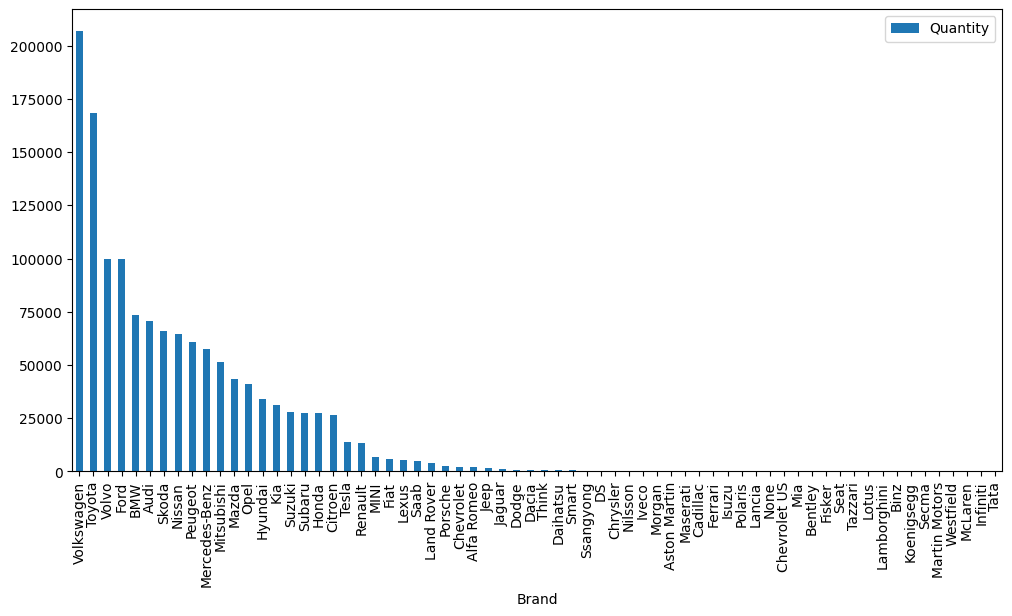

In [38]:
df_quantity_brand.plot(kind="bar", figsize=(12,6))

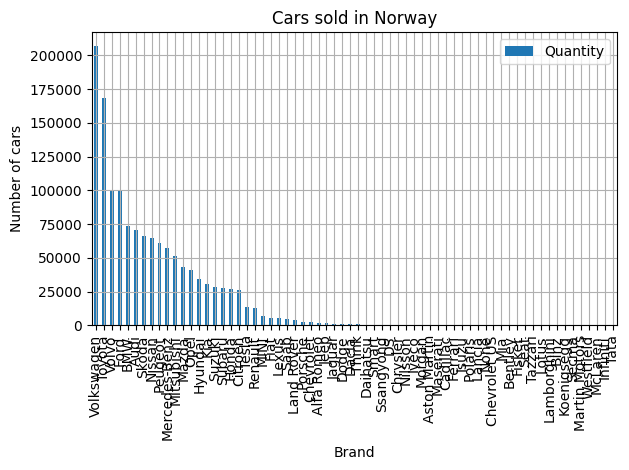

In [40]:
ax = df_quantity_brand.plot(kind="bar", title="Cars sold in Norway", ylabel="Number of cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_initial.png")

In [41]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


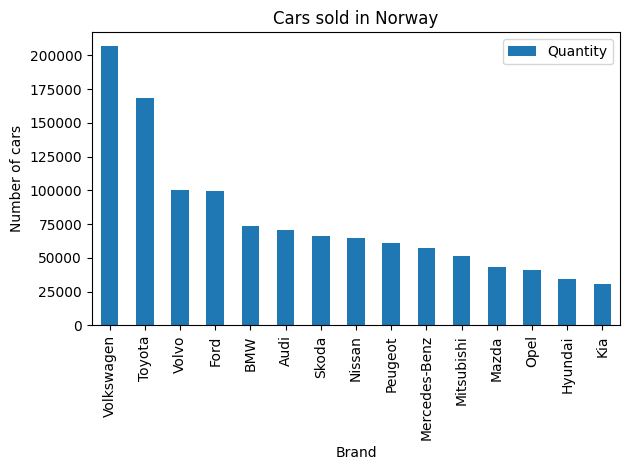

In [44]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")

In [47]:
df_percentage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100

df_percentage

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
Martin Motors     0.000074
Westfield         0.000074
McLaren           0.000074
Infiniti          0.000074
Tata              0.000074
Name: Quantity, Length: 66, dtype: float64

In [ ]:
df_percentage_top_10

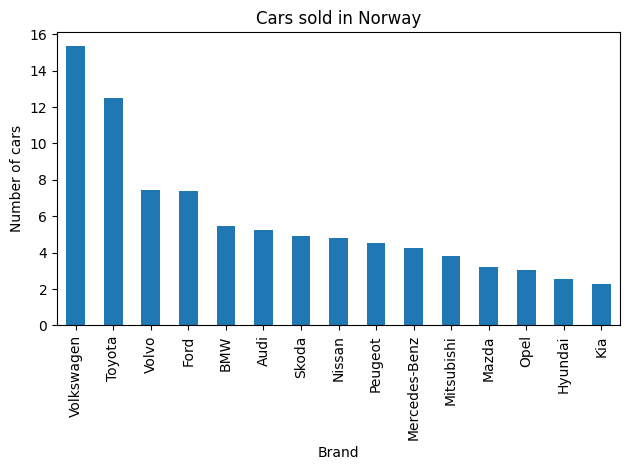

In [48]:
ax = df_percentage.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/2_bar_storytelling.png")

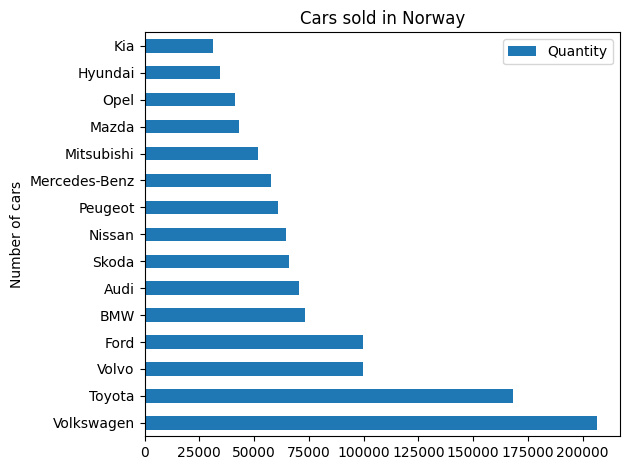

In [49]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="barh", title="Cars sold in Norway", ylabel="Number of cars")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")

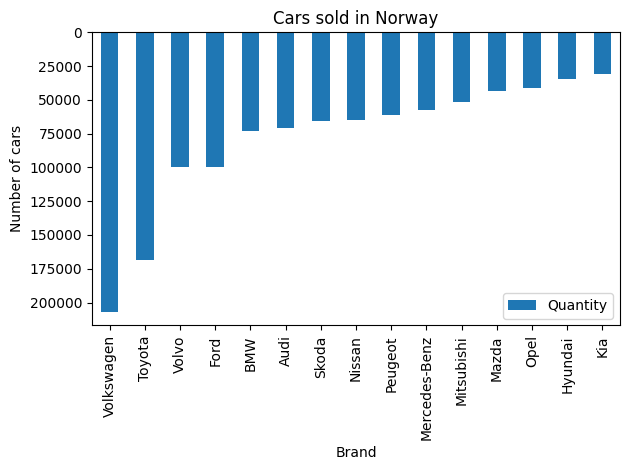

In [50]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars")

ax.invert_yaxis()

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")

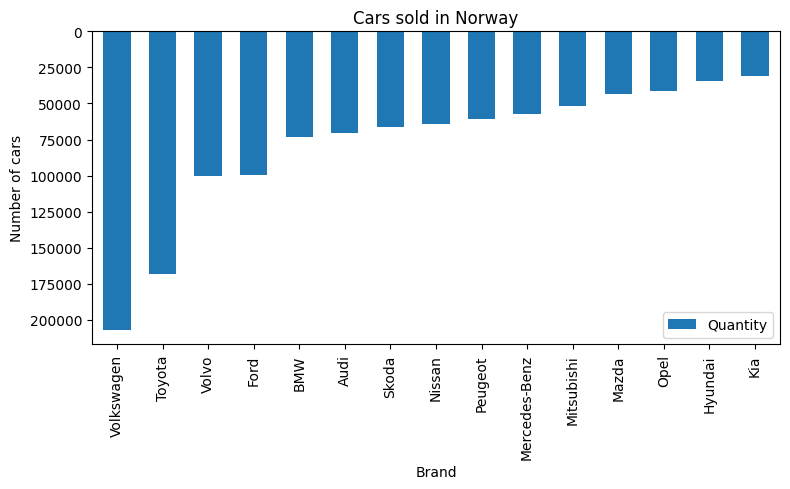

In [52]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars", figsize=(8, 5), width=0.6)

ax.invert_yaxis()

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")

In [53]:
ax.spines

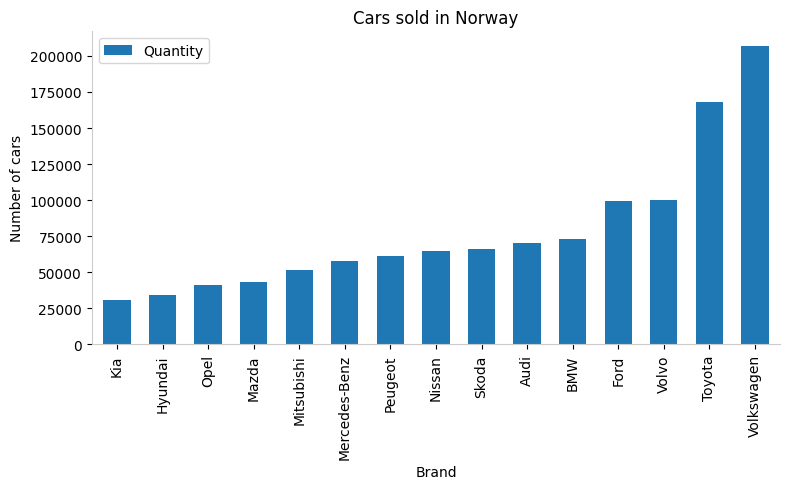

In [58]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars", figsize=(8, 5), width=0.6)

ax.invert_xaxis()

ax.spines[["top", "right"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color(GRAY_1)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")

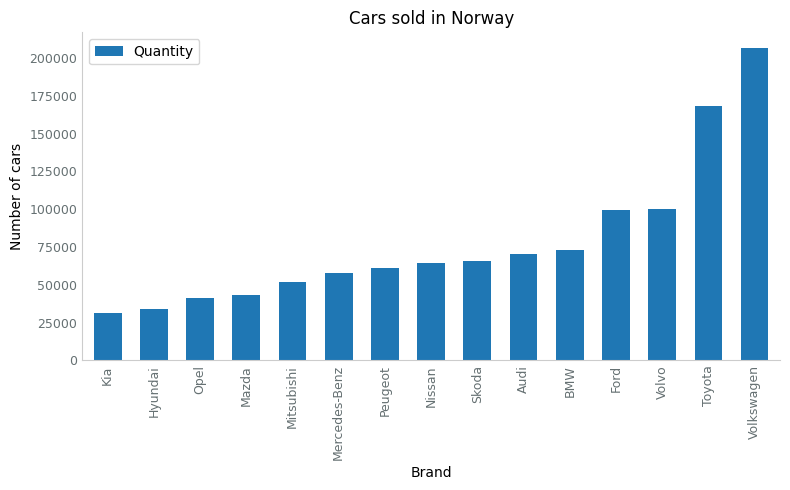

In [59]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars", figsize=(8, 5), width=0.6)

ax.invert_xaxis()

ax.spines[["top", "right"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors = GRAY_2, labelsize = 9, length=0)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")

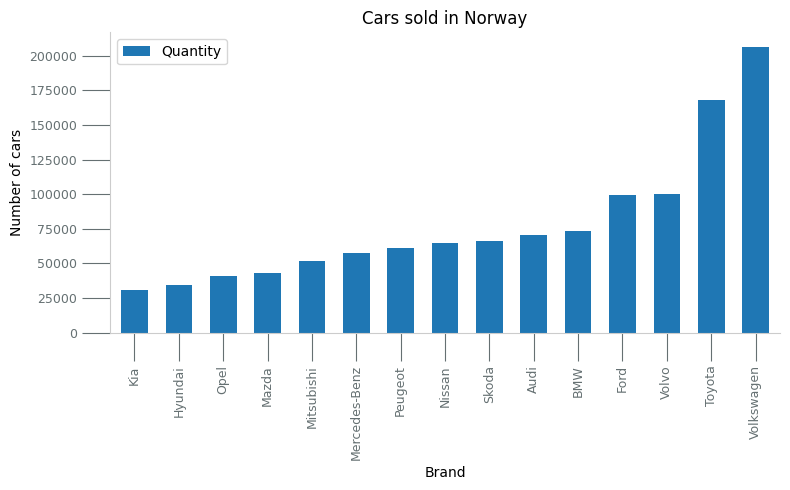

In [62]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars", figsize=(8, 5), width=0.6)

ax.invert_xaxis()

ax.spines[["top", "right"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors = GRAY_2, labelsize = 9, length=20)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")

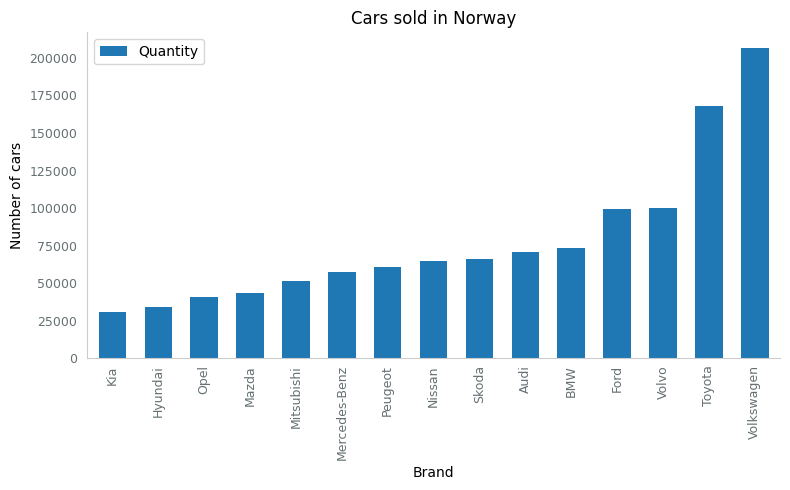

In [66]:
ax = df_quantity_brand.iloc[:15].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars", figsize=(8, 5), width=0.6)

ax.invert_xaxis()

ax.spines[["top", "right"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors = GRAY_2, labelsize = 9, length=0, pad = 5)

ax.tick_params(axis="y", pad = 7)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/o_bar_top15.png")